# Intro to Classification and Naïve Bayes

### Classification: basic terminology

<font color=green>__Classification:__ <font color = black> The ML task of predicting a categorical target variable.

<font color=green>__Positive instance:__<font color = black> An instance of interest / what we're looking to detect.

<font color=green>__Negative instance:__<font color = black> An instance that is not an example of what we're trying to detect.

<font color=green>__True positive/false positive/true negative/false negative:__<font color = black>
* True positive/negative: instances that are positive/negative and are correctly identified as such by our classification model.
* False positive: instance is really negative, but the model says it's positive.
* False negative: instance is really positive, but the model says it's negative.

<font color=green>__Confusion matrix:__<font color = black> A matrix calculated from labeled data that summarizes the correctness of predictions. A 2 x 2 matrix of counts, indicating the number of instances that were actually positive/negative, and predicted positive/negative.

    
$$\;\qquad\;\;\begin{matrix} \mathrm{predicted\; +}\quad & \mathrm{predicted\; -} \end{matrix}$$ $$\begin{matrix} \mathrm{actual\; +} \\ \mathrm{actual\; -} \end{matrix}\begin{bmatrix} \qquad TP &\quad\qquad & FN \qquad \\ \qquad FP & \quad\qquad & TN\qquad \end{bmatrix}$$<br>
    
$$\;\qquad\;\;\begin{matrix} \mathrm{predicted\; +}\quad & \mathrm{predicted\; -} \end{matrix}$$ $$\begin{matrix} \mathrm{actual\; +} \\ \mathrm{actual\; -} \end{matrix}\begin{bmatrix} \qquad 192 &\quad\qquad & 11 \qquad \\ \qquad 5 & \quad\qquad & 588\qquad \end{bmatrix}$$
    
  

<font color=green> __Joint probability:__ <font color = black> The probability of two events happening at once. The joint probability of $A$ and $B$ is written $P(A \cap B)$ or $P(A, B)$ or $P(AB)$. In a frequency matrix, joint probabilities come from individual cells.

<font color=green> __Independent events:__ <font color = black> If two events,  𝐴  and  𝐵 , are independent of each other, i.e. knowledge of one gives no knowledge of the other, then
$$ P(A \cap B) = P(A) P(B) $$

<font color=green> __Conditional probability:__ <font color = black> The conditional probability $P(A | B)$ satisfies
    
$$ P(A \cap B) = P(A | B) P(B) $$
Interpretation: probability we assign to event $A$ when we know the event $B$ has occurred.
    
In a frequency matrix, this corresponds to selecting out the row/column corresponding to the event $B$ and calculating the probability of $A$ just within that row.
$$ P(A | B) = \frac{P(A \cap B)}{P(B)} $$

#### Exercise

You can do the following calculations with Python, but write the matrix by hand on paper.

1. In the U.S., prevalence of HIV (according to the web) is 0.0033 cases per capita. Statistics about accuracy of HIV tests for cases outside the 3-month window after initial infection seem to all be from companies selling the tests. Here is a typical number: assume an HIV test is 99.68% accurate (and assume the same accuracy for both positive and negative cases). Construct a confusion matrix with the numbers you would expect for 100000 people who received this test given the above statistics. Call cases of infection positive, healthy negative. 
2. Use this matrix to estimate the probability that a person who receives a positive test actually has HIV. 
3. Estimate the probability that a person who has HIV receives a negative test.

1. First we're going to use the prevalence to get the actual number of positives and negatives:<br><br>
```
P = 0.0033 * 100,000 = 330
N = 100,000 – P = 99,670
```

    We can then use the test accuracy to divide the positives and negatives into correct and incorrect predictions. For example, 
```
TP (true positive) = 0.9968 * 330 = 329
TN (true negative) = 0.9968 * 99,670 = 99,351
```
    We can find the false positives and false negatives by subtracting the true positives/negatives from the actual number of positives and negatives.<br>
    Then we can construct the confusion matrix:

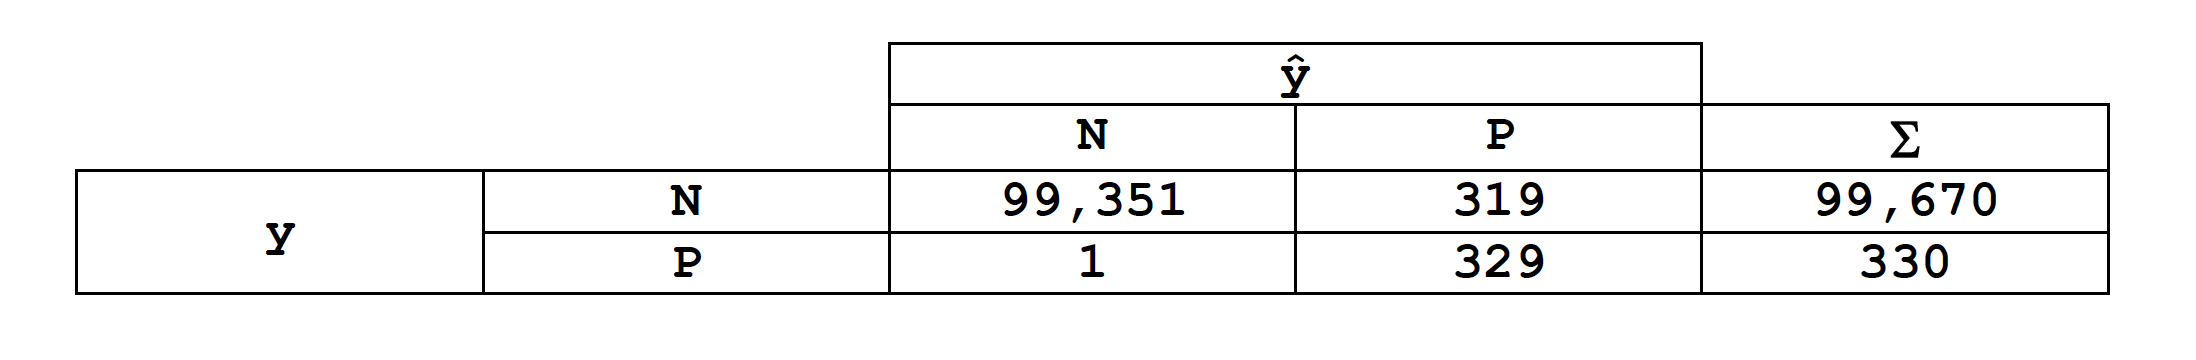

2. The probability that a person who receives a positive test actually has HIV can be rephrased as: *the probability of a person having HIV **given** they receive a positive test*, which is:
$$
\begin{align}
P(P_{y} | P_{\hat{y}}) &= \frac{P(P_{y} \cap P_{\hat{y}})}{P(P_{\hat{y}})} \\
&= \frac{329}{(329 + 319)} \\
&= 0.51
\end{align}
$$

3. The probability that a person who has HIV receives a negative test can be rephrased as: *the probability that a person who receives a negative test **given** they have HIV*, which is:
$$
\begin{align}
P(N_{\hat{y}} | P_{y}) &= \frac{P(N_{\hat{y}} \cap P_{y})}{P(P_{y})} \\
&= \frac{1}{(1 + 329)} \\
&= 0.003
\end{align}
$$

<font color=green>__Accuracy:__ <font color = black> The fraction of classifications that are correct. In our confusion matrix,
    
$$ \mathrm{accuracy} = \frac{\mbox{true pos + true neg}}{\mbox{sum of matrix}} $$
    
Accuracy doesn't tell the whole story -- in this example, a test that always comes back negative looks accurate, even though it doesn't do anything.

There are other measures of evaluation for our classifier, such as:

<font color=green>__Sensitivity:__ </font> The "true positive rate", `TP / (TP + FN)`. This is the probability of a positive test given that the patient is actually positive = the ability of the test to correctly identify positive patients. For the previous example, the sensitivity is 0.9968.

<font color=green>__Specificity:__ </font> The "true negative rate", `TN / (TN + FP)`. This is the probability of a negative test given that the patient is actually negative = the ability of the test to correctly identify negative patients. For this example, the specificity also happens to be 0.9968.

### The Naive Bayes classifier

<font color=green> __Bayes' theorem:__ <font color = black> The formula:
    
$$ P(A | B) = \frac{P(B | A) P(A)}{P(B)} $$
    
derived from
    
$$P(A \cap B) = P(A | B) P(B) = P(B | A) P(A) $$

<font color=green>__Data matrix notation:__  <font color=black> Review: We will use the symbol $\pmb X$ to denote our data matrices and $\pmb y$ to denote our labels vectors when we have labeled training data.  We will use $x_{i,j}$ to denote the individual elements of the data matrix.  <font color=black>The general form:<br>

$$\pmb{X} = \begin{bmatrix} \pmb{x_0} \\ \pmb{x_1} \\ \vdots \\ \pmb{x_N} \end{bmatrix} = \begin{bmatrix} x_{0,0} &  x_{0,1} & \ldots & x_{0,m} \\ x_{1,0} &  x_{1,1} & \ldots & x_{1,m} \\ \vdots & \vdots && \vdots \\ x_{N,0} & x_{N,1} & \ldots & x_{N,m}\end{bmatrix},\;\;\; \pmb{y} = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_N \end{bmatrix}$$<br>

<font color=green>__Example:__
    
$$\qquad\;\;\begin{matrix} age & income & gender\end{matrix}$$ $$\pmb{X} = \begin{matrix} 111-11-1111 \\ 222-22-2222 \\ 333-33-3333\end{matrix}\begin{bmatrix} 45 &  65 &\;\;\; M \\ 33 &  58 &\;\;\; F \\ 41 &\;\;\;\; 90\;\;\; & \;\;\;M \end{bmatrix},\;\;\; \pmb{y} = \begin{bmatrix} did \\ didn't \\ didn't \end{bmatrix}$$

<font color=green>__Naïve Bayes:__ <font color = black> Naïve Bayes is a classification technique which uses Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naïve Bayes classifier assumes that the presence of a particular feature (in the above example  the attributes relating to `age`, `income`, or `gender`) in an instance of a class is unrelated to the presence of any other feature.<br><br>Given some labeled data with a binary target variable (i.e. $y_i \in [0, 1]$), let's rewrite Bayes' theorem for an arbitrary instance:$$P(y = 1 \mid \pmb x) = \frac{P(\pmb x \mid y = 1) \cdot P(y = 1)}{P(\pmb x)}$$<br>
$x$ is the feature vector for a given instance. For example, the feature vector associated with the SSN `111-11-1111` in the above matrix would be the vector `[45, 65, M]`, and $y_{i}$ = 1 (or 'did')

We want to calculate what we call the posterior probability of a class ($ y = 1$) given the attributes of the feature vector. Using rewritten version of Bayes' theorem above, let's break this down into different parts.
    
- $P(y = 1|x)$ is the **posterior** probability of the class ($y = 1$, target) given predictor (x, attributes). *(this is what we're predicting)*
- $P(y = 1)$ is the **prior** probability of the class $y = 1$.
- $P(x| y = 1)$ is the **likelihood** which is the probability of predictor given $y = 1$.
- $P(x)$ is the prior probability of predictor. It is the sum of $P(x \cap y = 1)$ and $P(x \cap y = 0)$ (for a binary classification problem), the *total probability* of a predictor. This can be further rewritten as: $$P(\pmb x) = P(\pmb x \mid y = 1) \cdot P(y = 1) + P(\pmb x \mid y = 0) \cdot P(y = 0)$$

<font color=green>__Conditional independence:__ <font color = black> The features of arbitrary feature vector $\pmb {x_a}$ are conditionally independent.  Therefore:<br><br>
$$
\begin{align}
P(\pmb {x_a} \mid y = 1) &= P(x_{a0} \cap x_{a1} \cap \cdots \cap x_{am} \mid y = 1) \\
&= P(x_{a0} \mid y = 1) \cdot P(x_{a1} \mid y = 1) \cdot \cdots \cdot P(x_{am} \mid y = 1)
\end{align}
$$<br>We know (hopefully) how to calculate all of these individual conditional probabilities.  We often have no basis for assuming conditional independence.  However, in practice it often works quite because the assumption often causes the probabilities to be distorted in the direction that leads to correct classification.  However, if we want to estimate actual probabilities, then we probably don't want naïve Bayes.

<font color=green>__Finishing naïve Bayes - from data to estimated probability:__ <font color=black>

<font color=green>__Incremental learner:__ <font color = black> A learning algorithm that can incorporate new data on the fly, without re-fitting the entire model. Naive Bayes is an example of such a learner. (This process is also called *on-line learning*.)

#### Exercise

Let's do a simple naive Bayes calculation. The data we'll be using in this lecture is a famous dataset known as the Titanic dataset - you might have come across it in other courses. It is frequently used as a good practice dataset for getting started with machine learning. You can find the original data here: https://www.kaggle.com/c/titanic/data. Consider the following data matrix. This data contains information about passengers and whether or not they survived the sinking of the Titanic. We will be using a few of the available variables to predict the `Survived` variable.

In [128]:
# code used to create subset of titanic data.
from sklearn.model_selection import train_test_split
train_df = pd.read_csv('train.csv')
train_df = train_df[train_df['Age'].isnull() == False] 
train_df = train_df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Survived"]]
X_train, X_test = train_test_split(train_df, train_size = 0.8, test_size = 0.2, random_state = 42)
X_train.to_csv("titanic_train_processed.csv", index = False)
X_test.to_csv("titanic_dev_processed.csv", index = False)

The data has been split into two pre-processed sets - `titanic_train_processed.csv` (our "training" dataset for our classifier) and `titanic_dev_processed.csv` (the dataset we'll use to evaluate the performance of our classifier).

In [243]:
import pandas as pd, numpy as np
titanic_train = pd.read_csv('titanic_train_processed.csv')
print(titanic_train)

     Pclass     Sex   Age  SibSp  Parch  Survived
0         3  female  31.0      1      1         1
1         3    male  26.0      1      0         0
2         3    male  30.0      1      0         0
3         3    male  33.0      0      0         0
4         2    male  25.0      0      0         0
..      ...     ...   ...    ...    ...       ...
566       1    male  46.0      1      0         0
567       2    male  25.0      0      0         0
568       1  female  41.0      0      0         1
569       3    male  33.0      1      1         0
570       3    male  33.0      0      0         0

[571 rows x 6 columns]


We would like to make predictions on the passengers in the dev dataframe, below. The dev data contains the labels (our `Survived` variable) because we need a way to measure our performance, but we'll extract just the X variables (features!) for making our predictions (the labels will come in handy at the end).

In [244]:
titanic_dev = pd.read_csv('titanic_dev_processed.csv')
X_dev = titanic_dev[["Pclass", "Sex", "Age", "SibSp", "Parch"]]
print(X_dev)

     Pclass     Sex   Age  SibSp  Parch
0         2    male  42.0      0      0
1         2    male   3.0      1      1
2         2  female  29.0      1      0
3         1  female  24.0      0      0
4         3    male  43.0      0      0
..      ...     ...   ...    ...    ...
138       3    male  10.0      3      2
139       3    male   1.0      4      1
140       3    male  35.0      0      0
141       2  female  21.0      0      0
142       1  female  19.0      0      2

[143 rows x 5 columns]


Based on Naïve Bayes, we're going to predict whether or not these 143 passengers survived the sinking of the Titanic! We'll break it down into a few steps, corresponding to the pieces of Bayes' theorem used in the Naïve Bayes algorithm.

1. Write a function called `get_single_likelihood` which implements the calculation of $P(X_i = x | Y = y)$. Given a feature name, a value of that feature, an outcome value (either 0 or 1), and a data frame, calculate the probability that, given that outcome, the named feature will equal the given value.

    Example: the call `get_single_likelihood('Sex', 'male', 1, titanic_train)` should return the probability that, among applicants for whom `Survived == 1`, their `Sex` attribute is `male`.

In [225]:
def get_single_likelihood(feature_name, value, outcome, df):
    freq_x_and_y = len(df[(df[feature_name] == value) & (df['Survived'] == outcome)])
    freq_y = len(df[df['Survived'] == outcome])
    return freq_x_and_y + 1 / freq_y + 2 # do not add +1 and +2 in the first pass! come back

In [226]:
# Calculate this by hand and check your function's output against the result.
get_single_likelihood('Sex', 'male', 1, titanic_train)

75.0042735042735

2. Write a function called `get_joint_likelihood` which implements the calculation of $P(X_0 = x_0, X_1 = x_1, \ldots | Y = y)$. Given a `Series` representing a feature vector, an outcome value (0 or 1), and a data frame, calculate the probability that, given that outcome, all features will equal the values in the feature vector. (Hint: loop over `features.index`, which contains the feature names, and call `get_single_likelihood`. Multiply together the values you get and return the product.)

In [227]:
def get_joint_likelihood(features, outcome, df):
    joint_likelihood = 0
    for feature in features.index: # do the multiplication first pass, not log and exp.
        joint_likelihood += np.log(get_single_likelihood(feature, features.loc[feature], outcome, df))
    return np.exp(joint_likelihood)

3. Write a function called `get_prior` which calculates $P(Y = y)$. That is, given an outcome value (0 or 1) and a data frame, `get_prior(outcome, df)` return the estimated probability in that data frame that `y == outcome`.

In [228]:
def get_prior(outcome, df):
    return len(df[df['Survived'] == outcome]) / len(df)

4. Finally, put all the pieces of Bayes' theorem together. Write a function called `get_prob` that takes a new feature vector (in the form of a `Series`) and returns the estimated probability

$$ P(y = 1 | \pmb X = \pmb x) $$

where the vector equation $\pmb X = \pmb x$ stands for $X_0 = x_0, X_1 = x_1, \ldots$. Remember this is calculated by Bayes' theorem as

$$ P(y = 1 | \pmb X = \pmb x) = \frac{P(\pmb X = \pmb x | y = 1) P(y = 1)}{ P(\pmb X = \pmb x | y = 1) P(y = 1) + P(\pmb X = \pmb x | y = 0) P(y = 0) } $$

and everything on the right-hand side can be calculated by either `get_prior` or `get_joint_likelihood`.

In [229]:
def get_prob(features, df):
    outcome_true = get_joint_likelihood(features, 1, df) * get_prior(1, df)
    outcome_false = get_joint_likelihood(features, 0, df) * get_prior(0, df)
    return outcome_true / (outcome_true + outcome_false)

In [230]:
# Should give the probability on the first new day that Barbara should play tennis.
get_prob(titanic_dev.iloc[0], titanic_train)

0.0002760040036944185

We could stop here, as we have a functional calculation system. But, let's implement the following function to process a bunch of data at once.

5. Write a function called `predict_df` that takes a `DataFrame` of new features and a `DataFrame` of labeled data and makes predictions for all of them. Iterate over the rows of the new frame, passing them to `get_prob` to obtain probabilities, and return a `Series` of predictions. Your series should have values of 0 or 1. Predict 1 if the predicted probability is greater than 0.5, 0 otherwise.

In [231]:
def predict_df(new_data, df):
    predictions = pd.Series([int(get_prob(new_data.iloc[i], df) > 0.5) for i in range(len(new_data))])
    return predictions

Now that we're able to process a bunch of data at once, let's use our dev set to evaluate our classifier. The dev (or development) set is also often called the "validation" set. We use it to evaluate our models before it's time to test, to make sure we aren't overfitting (don't worry about this now!) to our test data.

In [235]:
y_pred = predict_df(X_dev, titanic_train)
print(y_pred)

0      0
1      0
2      0
3      1
4      0
      ..
138    0
139    0
140    0
141    0
142    1
Length: 143, dtype: int64


Now we can make a confusion matrix and calculate our classification accuracy to determine how our model is performing.

In [240]:
# finally let's create a confusion matrix to evaluate the performance of our classifier:
from sklearn.metrics import confusion_matrix, accuracy_score

print(confusion_matrix(titanic_dev.Survived, y_pred))

# we can also calculate our classification accuracy
print("Proportion of correct classifications:", accuracy_score(titanic_dev.Survived, y_pred))

[[84  3]
 [38 18]]
Proportion of correct classifications: 0.7132867132867133


<font color = green> **What are the weaknesses of the approach we took above?**

## Application: a simple spam filter

<font color=green>__Natural language processing, NLP:__ </font> The ML task of processing and analyzing human written texts.

<font color=green>__Corpus:__</font> A collection of written documents that can be anything - emails, articles, books, etc., usually pertaining to a particular topic. Corpora are used as data for NLP tasks.

<font color=green>__Token:__</font> A unit of text. In NLP, we break documents into tokens (essentially, words that are preprocessed a bit).

<font color=green>__Stemming:__</font> One of the ways we pre-process text is by using stemming. Stemming is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. It's essentially a basic form of a word that doesn't depend on tense. Do the words `fast`, `faster`, `fastest` contain different information as far as our model goes?

<font color=green>__Stop words:__ </font> Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc.

<font color=green>__$\lnot$:__ </font> Logical not.  E.g. if $S$ stands for `spam`, then $\lnot S$ stands for `not spam`.

<font color=green> __Bayes' theorem for binary classification:__ </font> Let's use these identities to reformulate Bayes' theorem:<br><br>$$P(B) = P(B \cap A) + P(B \cap \lnot A)$$<br>and our conditional probability formula:<br>$$P(A \cap B) = P(A) \cdot P(B \mid A)$$<br> From this we can get a new conditional probability:<br><br>$$P(A \mid B) \;=\; \frac{P(B \mid A) \cdot P(A)}{P(B)} \;=\; \frac{P(B \mid A) \cdot P(A)}{P(B \cap A) + P(B \cap \lnot A)} \;=\; \frac{P(B \mid A) \cdot P(A)}{P(B \mid A) \cdot P(A) + P(B \mid \lnot A) \cdot P(\lnot A)}$$<br>

<font color=green>__A basic spam filter:__ <font color = black> Read and preprocess a collection of spam and non-spam (a.k.a. ham) emails. For each token $x_i$ that appears in the corpus, calculate 

$P(x_i | \mathrm{spam}) = \frac{spam x_i} {total spams}$

and calculate $P(x_i | \mathrm{ham})$ by the same method. Then, given a new email, process it into tokens and use naive Bayes to estimate $P(\mathrm{spam} | x_0, x_1, \ldots, x_n)$, where $x_0, \ldots, x_n$ are the tokens appearing in the email.

<font color = green> **Floating point error:**

In [ ]:
0.1 + 0.2 + 0.3 + 0.4

In [ ]:
0.4 + 0.3 + 0.2 + 0.1

<font color=green>__Underflow:__ </font> Strictly speaking, underflow occurs when the absolute value of the result of a floating point calculation in a computer is smaller than the smallest positive number that the machine can represent.  A related problem is that when multiplying a bunch of really small numbers together, the roundoff error instrinsic to floating point calculations can become really problematic.  And that's exactly what will happen in our algorithm.  We will take advantage of our knowledge of logarithms to mitigate this problem.  To get $x = cp_1 \cdot cp_2 \cdot \cdots \cdot cp_n$ where each $cp$ is a conditional probability, we will combine $log(mn) = log(m) + log(n)$ and $exp(log(x)) = x$ to get: <br><br>$$x = exp(log(cp_1) + \cdots + log(cp_n))$$<br>Our logs have much larger absolute values than the cp's themselves and we're doing addition instead of multiplication, so our underflow issues are gone.

<font color=green>__Hyperparameter:__</font> A hyperparameter is a parameter (variable) in our model whose value is set before the training process begins.  This is in contrast to a parameter, which is a variable whose value is optimized during the training process to maximize model performance.  Models are often trained multiple times using different hyperparameter values to see which one works best.  This is called `tuning`.

<font color=green>__Pseudocount k:__</font> A hyperparameter that we will use to make sure that one token doesn't make an email that we are classifying have zero probability of being `spam`.  Since $P(x_i \mid S)\; =\; number\; of\; spams\; containing\; x_i\; /\; number\; of\; spams$, if we have any token $x_i$ that doesn't occur in any spams, $P(x_i \mid S) = 0$ and therefore the product of the probabilities for all of the tokens will also be 0.  So we will adjust our calculation of the conditional probability: <br><br>$$P(x_i \mid S)\; =\; (k\; +\; number\; of\; spams\; containing\; x_i)\; /\; (2k\; +\; number\; of\; spams)$$

<font color=green>__defaultdict:__</font> A class in Python's `collections` module that will automatically initialize a value for you in the situations where a regular dictionary would give you a key error.

In [245]:
from collections import defaultdict
dct = defaultdict(int)
dct

defaultdict(int, {})

In [246]:
dct['a'] += 1
dct

defaultdict(int, {'a': 1})